In [12]:
library(ggplot2)
library(dplyr)

data <- read.csv("Bewertung.csv")
# Remove the last two columns as they were wrongfully in the exported csv
data <- data[, -c((ncol(data) - 1):ncol(data))]
# Rename the columns, makes it easier to work with
names(data) <- c("timestamp", "age", "gender", "country", "frequency_buy", "important", "bought_six_months", "prod1_initial", "prod1_high_good", "prod1_single_good", "prod1_single_qual", "prod1_low_good", "prod1_high_bad", "prod1_med_average", "buy_aborted", "prod1_high_very_good", "prod2_initial", "prod2_high_good", "prod2_single_good", "prod2_low_good", "prod2_high_bad", "prod2_med_average", "fake", "trust", "verfication", "details", "mixed")
head(data)

,timestamp,age,gender,country,frequency_buy,important,bought_six_months,prod1_initial,prod1_high_good,prod1_single_good,⋯,prod2_high_good,prod2_single_good,prod2_low_good,prod2_high_bad,prod2_med_average,fake,trust,verfication,details,mixed
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
1,2024/01/15 11:01:50 AM MEZ,28,Männlich,Deutschland,5,4,Nein,4,5,5,⋯,4,5,5,2,2,Ja,3,NA,5,3
2,2024/01/17 8:42:00 AM MEZ,26,Männlich,Deutschland,4,4,Ja,3,4,5,⋯,5,5,4,2,2,Ja,3,5,5,3
3,2024/01/19 3:25:26 PM MEZ,27,Weiblich,Deutschland,5,5,Ja,4,5,5,⋯,3,3,1,1,1,Ja,3,5,5,3
4,2024/01/19 6:13:38 PM MEZ,34,Männlich,China,3,4,Nein,1,4,4,⋯,4,4,3,1,2,Ja,3,5,5,4
5,2024/01/19 6:25:11 PM MEZ,23,Weiblich,China,2,4,Ja,4,4,5,⋯,4,3,2,1,2,Ja,4,4,5,2
6,2024/01/20 1:09:06 PM MEZ,24,Weiblich,China,4,4,Ja,4,4,5,⋯,1,1,1,1,1,Ja,3,4,4,3


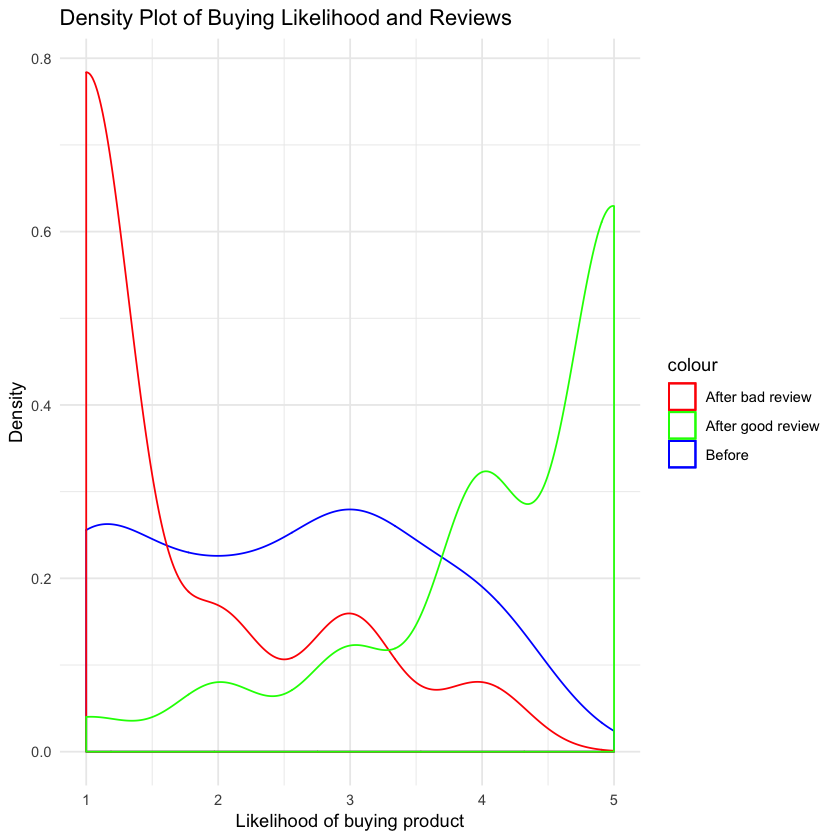

In [39]:
# Not informative maybe rework
ggplot(data, aes(x = data$prod1_initial, color = "Before")) +
  geom_density() +
  geom_density(aes(x = data$prod1_high_bad, color = "After bad review"), alpha = 0.7) +
  geom_density(aes(x = data$prod1_high_very_good, color = "After good review"), alpha = 0.7) +
  labs(title = "Density Plot of Buying Likelihood and Reviews",
       x = "Likelihood of buying product", y = "Density") +
  scale_color_manual(values = c("Before" = "blue", "After bad review" = "red", "After good review" = "green")) +
  theme_minimal()

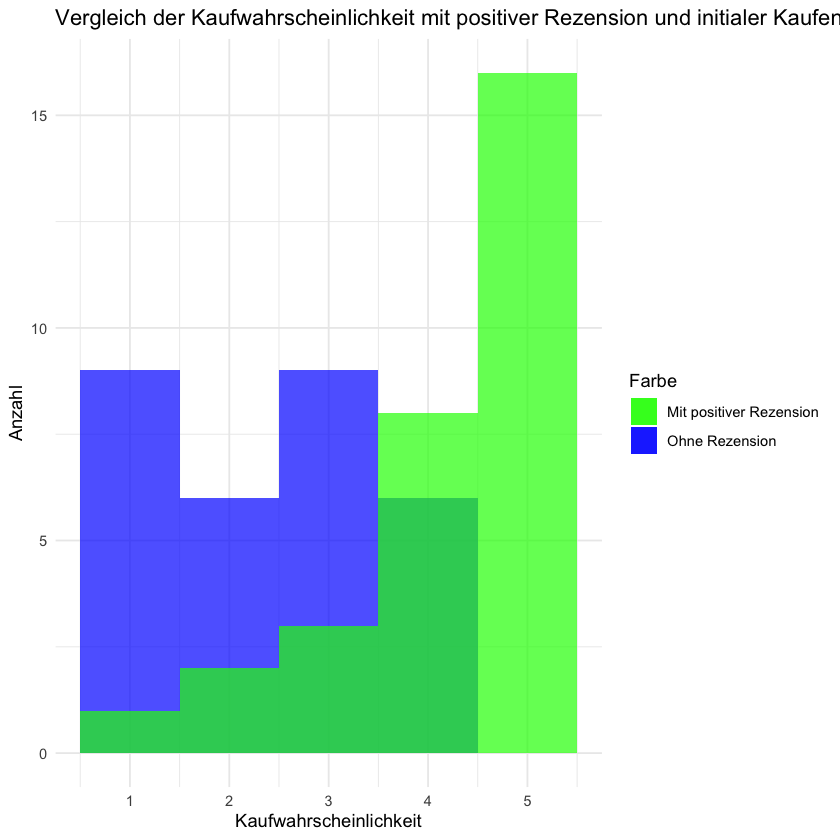

In [10]:
ggplot(data, aes(x = `prod1_initial`, fill = "Ohne Rezension")) +
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.7) +
  geom_histogram(aes(x = `prod1_high_very_good`, fill = "Mit positiver Rezension"), binwidth = 1, position = "identity", alpha = 0.7) +
  labs(title = "Vergleich der Kaufwahrscheinlichkeit mit positiver Rezension und initialer Kaufentscheidung",
       x = "Kaufwahrscheinlichkeit", y = "Anzahl") +
  scale_fill_manual(name = "Farbe", values = c("Ohne Rezension" = "blue", "Mit positiver Rezension" = "green")) +
  theme_minimal()
# SVG is not working on mac need to test on windows
ggsave("img/box_likelihood_good.png", device = "png", width = 8, height = 6, units = "in", dpi = 300, bg = "transparent")

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


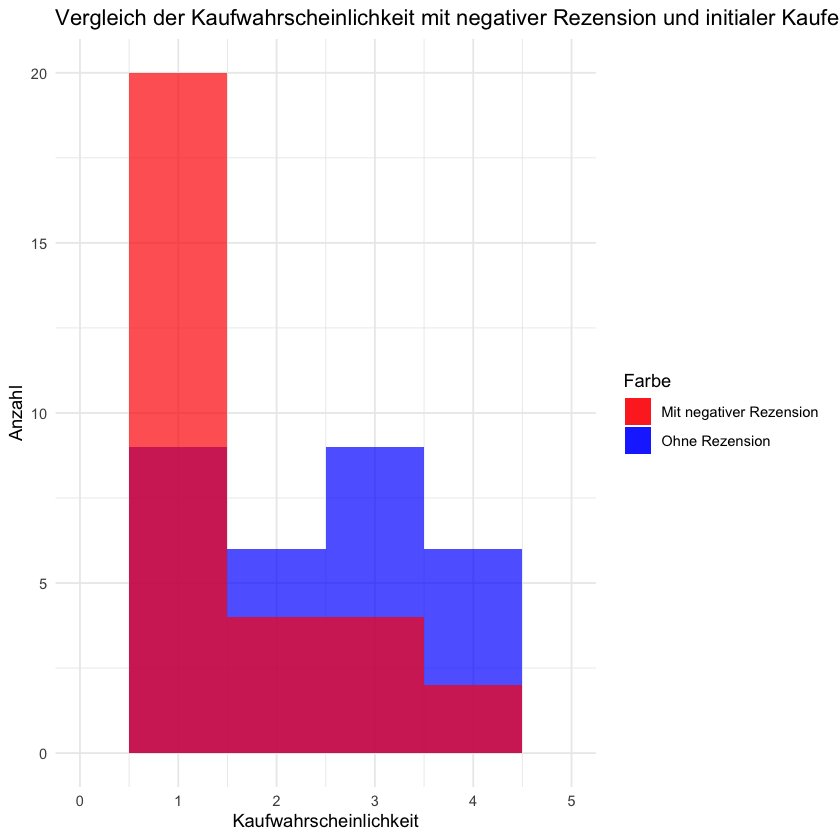

In [13]:
ggplot(data, aes(x = `prod1_initial`, fill = "Ohne Rezension")) +
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.7) +
  geom_histogram(aes(x = `prod1_high_bad`, fill = "Mit negativer Rezension"), binwidth = 1, position = "identity", alpha = 0.7) +
  labs(title = "Vergleich der Kaufwahrscheinlichkeit mit negativer Rezension und initialer Kaufentscheidung",
       x = "Kaufwahrscheinlichkeit", y = "Anzahl") +
  scale_fill_manual(name = "Farbe", values = c("Ohne Rezension" = "blue", "Mit negativer Rezension" = "red")) +
  theme_minimal() +
  xlim(0, 5) +
  ylim(0,20)

ggsave("img/box_likelihood_bad.png", device = "png", width = 8, height = 6, units = "in", dpi = 300, bg = "transparent")

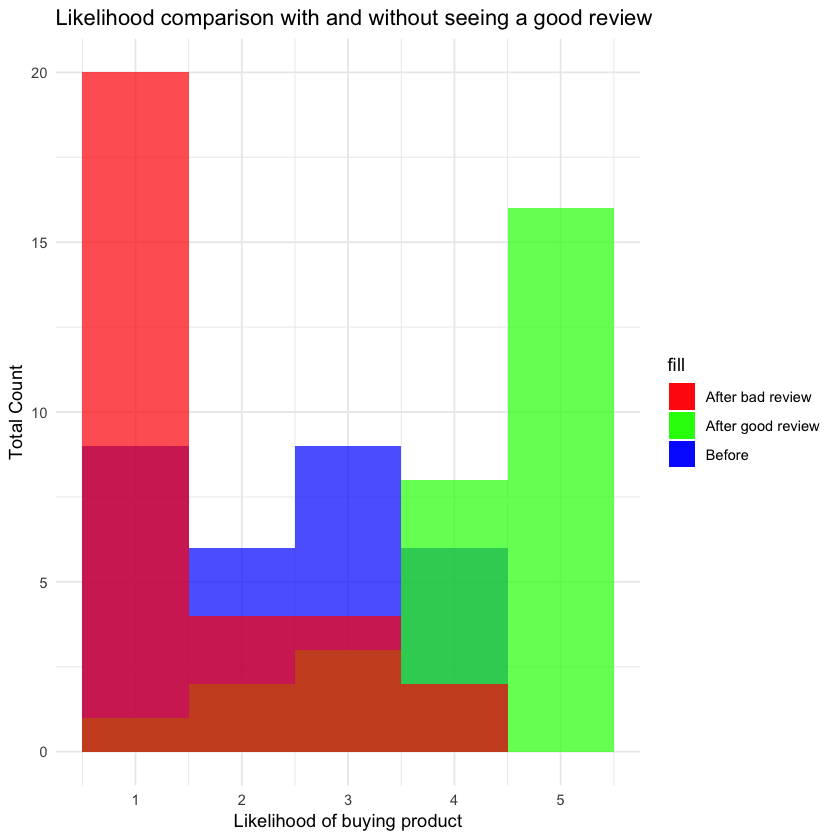

In [2]:
ggplot(data, aes(x = data$prod1_initial, fill = "Before")) +
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.7) +
  geom_histogram(aes(x = data$prod1_high_very_good, fill = "After good review"), binwidth = 1, position = "identity", alpha = 0.7) +
  geom_histogram(aes(x = data$prod1_high_bad, fill = "After bad review"), binwidth = 1, position = "identity", alpha = 0.7) +
  labs(title = "Likelihood comparison with and without seeing a good review",
       x = "Likelihood of buying product", y = "Total Count") +
  scale_fill_manual(values = c("Before" = "blue", "After good review" = "green", "After bad review" = "red")) +
  theme_minimal()

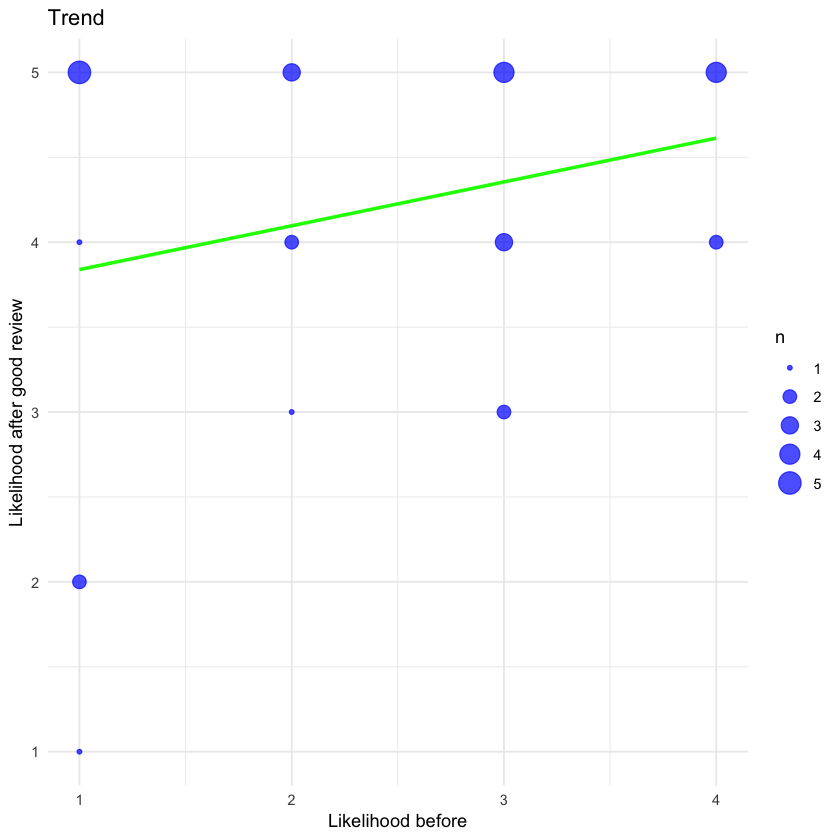

In [42]:
ggplot(data, aes(x = data$prod1_initial, y = data$prod1_high_very_good)) +
  geom_count(alpha = 0.7, color = "blue") +
  geom_smooth(method = "lm", se = FALSE, color = "green") +
  labs(title = "Trend",
       x = "Likelihood before", y = "Likelihood after good review") +
  theme_minimal()

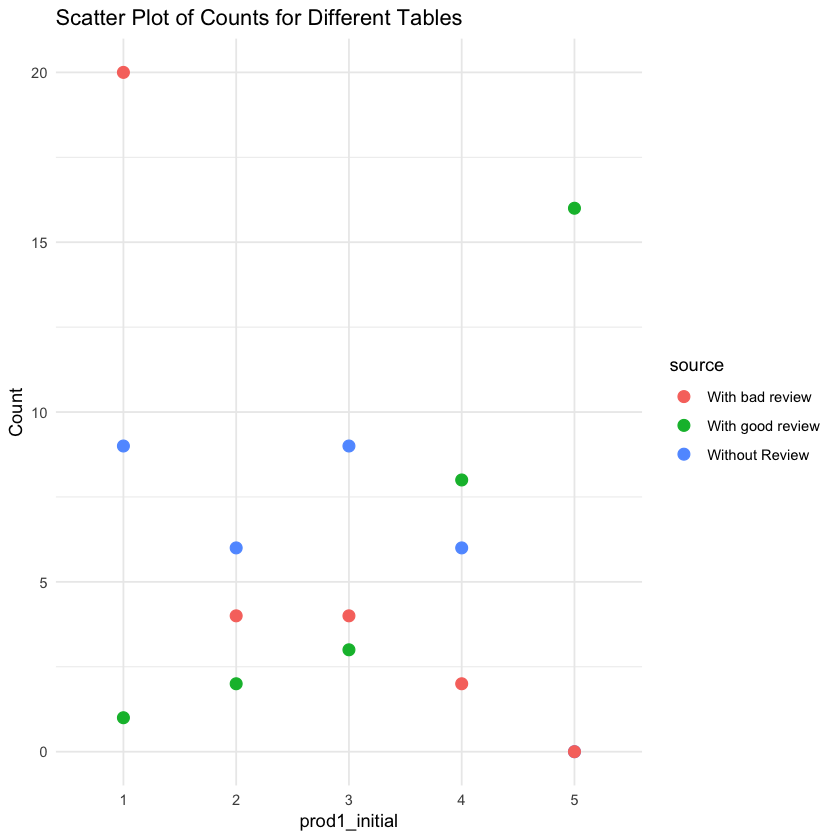

In [43]:
scale <- factor(1:5, levels = 1:5)
prod1_initial_counts <- as.data.frame(table(factor(data$prod1_initial, levels = scale)))
prod1_bad_counts <- as.data.frame(table(factor(data$prod1_high_bad, levels = scale)))
prod1_good_counts <- as.data.frame(table(factor(data$prod1_high_very_good, levels = scale)))

combined_counts_df <- rbind(mutate(prod1_initial_counts, source = "Without Review"),
                            mutate(prod1_bad_counts, source = "With bad review"),
                            mutate(prod1_good_counts, source = "With good review"))

# Leads to misinterpretation as count is shifted but is not represented by points
ggplot(combined_counts_df, aes(x = Var1, y = Freq, color = source)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of Counts for Different Tables",
       x = "prod1_initial", y = "Count") +
  theme_minimal()


In [ ]:
# T-tests
## Hypothese 1
